In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import tensorflow as tf

plt.rcParams['figure.figsize'] = (5,5)
plt.rcParams['figure.dpi'] = 150

In [44]:
df_gamma = pd.read_csv('/eos/user/p/psimkina/gamma_dataset/records_1', index_col=(0,1))
df_jet = pd.read_csv('/eos/user/p/psimkina/gamma_dataset/jet_records_1', index_col=(0,1))

In [45]:
df_jet = df_jet[['et_cluster', 'in_sc', 'parton_pdg', 'parton_pt']]
df_gamma = df_gamma[['et_cluster', 'in_sc']]

In [46]:
df_jet = df_jet[(df_jet['parton_pdg']!=6) & (df_jet['parton_pdg']!=-6)]

In [47]:
low_energy = df_jet[df_jet['parton_pt'] < 100]
high_energy = df_jet[df_jet['parton_pt'] >= 100]

In [48]:
low_energy

et_cluster  in_sc  parton_pdg  parton_pt
27325  0   36.053590      1        21.0  95.509850
       1    1.432054      1        21.0  95.509850
       2    0.400021      1        21.0  95.509850
27328  0   27.083754      1        21.0  95.509850
       1    1.187545      1        21.0  95.509850
...              ...    ...         ...        ...
195145 1    4.102782      1         1.0  12.608107
       2    2.830133      1         1.0  12.608107
       3    0.295130      0         1.0  12.608107
195154 0    1.016258      1        -3.0  80.731415
       1    0.377576      0        -3.0  80.731415

[228974 rows x 4 columns]

In [49]:
df_jet['et_window'] = df_jet['in_sc']*df_jet['et_cluster']
df_gamma['et_window'] = df_gamma['in_sc']*df_gamma['et_cluster']

In [50]:
low_energy['et_window'] = low_energy['in_sc']*low_energy['et_cluster']
high_energy['et_window'] = high_energy['in_sc']*high_energy['et_cluster']

df_gamma['et_window'] = df_gamma['in_sc']*df_gamma['et_cluster']

/tmp/ipykernel_1176/1652999877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_energy['et_window'] = low_energy['in_sc']*low_energy['et_cluster']
/tmp/ipykernel_1176/1652999877.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_energy['et_window'] = high_energy['in_sc']*high_energy['et_cluster']


In [51]:
et_window_low = low_energy.groupby(level=0).sum()
et_window_high = high_energy.groupby(level=0).sum()

In [52]:
et_window_low = et_window_low[et_window_low['et_window'] < 100]
et_window_high = et_window_high[et_window_high['et_window'] < 100]

et_window_gamma = df_gamma.groupby(level=0).sum()
et_window_gamma = et_window_gamma[et_window_gamma['et_window'] < 100]

In [76]:
et_window_low.describe()

,et_cluster,in_sc,parton_pdg,parton_pt,et_window
count,41718.000000,41718.000000,41718.000000,41718.000000,41718.000000
mean,10.625133,2.868546,52.620428,320.745391,9.423057
std,12.157609,2.307835,79.131988,275.494385,12.152727
min,0.776870,1.000000,-135.000000,2.173380,0.774213
25%,2.938760,1.000000,-4.000000,116.717410,1.737859
50%,5.585174,2.000000,21.000000,245.144348,4.056758
75%,13.465043,4.000000,84.000000,443.122237,12.136356
max,100.076315,22.000000,609.000000,3078.151098,99.800921


In [77]:
et_window_high.describe()

,et_cluster,in_sc,parton_pdg,parton_pt,et_window,w_bin,weight
count,60610.000000,60610.000000,60610.000000,60610.000000,60610.000000,60610.000000,60610.000000
mean,23.214395,3.499423,74.737898,1704.071451,22.072756,8.113628,1.000000
std,29.932437,3.930379,106.864027,1635.253972,29.981549,8.744473,1.113549
min,0.773874,1.000000,-175.000000,100.020620,0.773874,0.000000,0.031471
25%,2.576090,1.000000,4.000000,576.604467,1.480733,1.000000,0.054857
50%,5.088733,2.000000,42.000000,1187.860500,3.367277,3.000000,0.218429
75%,42.124234,4.000000,105.000000,2252.894030,41.164161,16.000000,2.275928
max,131.742038,33.000000,861.000000,15637.154240,99.998790,27.000000,3.108320


In [53]:
import numpy as np 
bins = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100, np.inf]

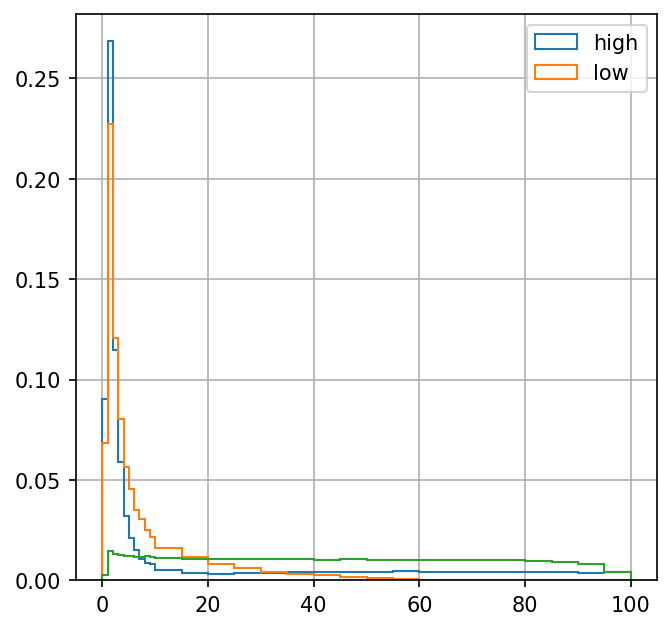

In [54]:
values_jets_high, bins, _ = plt.hist(et_window_high['et_window'], histtype='step',  bins=bins, density=True, label='high')
values_jets_low, bins, _ = plt.hist(et_window_low['et_window'], histtype='step',  bins=bins, density=True, label='low')
values_gamma, bins, _ = plt.hist(et_window_gamma['et_window'], histtype='step',  bins=bins, density=True)
plt.legend()
plt.grid()

In [55]:
ratio_low = values_gamma/values_jets_low
ratio_high = values_gamma/values_jets_high
ratio_low.shape, bins.shape

/tmp/ipykernel_1176/1907580068.py:1: RuntimeWarning: invalid value encountered in true_divide
  ratio_low = values_gamma/values_jets_low
/tmp/ipykernel_1176/1907580068.py:2: RuntimeWarning: invalid value encountered in true_divide
  ratio_high = values_gamma/values_jets_high


((29,), (30,))

In [56]:
bins

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,
        70.,  75.,  80.,  85.,  90.,  95., 100.,  inf])

In [57]:
d_low = {'start_bin': bins[:-1],
    'end_bin': bins[1:], 
    'weight': ratio_low}

d_high = {'start_bin': bins[:-1],
    'end_bin': bins[1:], 
    'weight': ratio_high}

In [61]:
d_high

{'start_bin': array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,
         70.,  75.,  80.,  85.,  90.,  95., 100.]),
 'end_bin': array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  15.,
         20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,  70.,
         75.,  80.,  85.,  90.,  95., 100.,  inf]),
 'weight': array([0.0314705 , 0.05485672, 0.11535608, 0.21842892, 0.38306947,
        0.58224338, 0.77600143, 1.07903954, 1.42135363, 1.40687245,
        2.20147109, 3.02564372, 3.10831973, 2.99860867, 2.84752878,
        2.52292966, 2.37011316, 2.3797175 , 2.3697807 , 2.26116403,
        2.32202178, 2.27592798, 2.25811728, 2.34988754, 2.33706357,
        2.31331262, 2.13560146, 1.10934646,        nan])}

In [58]:
df_weights_low = pd.DataFrame(data=d_low)
df_weights_high = pd.DataFrame(data=d_high)

In [59]:
et_window_high['w_bin'] = np.digitize(et_window_high.et_window, bins)-1

In [64]:
et_window_high = et_window_high.join(pd.DataFrame(ratio_high, columns=['weight']), on='w_bin')

In [65]:
et_window_high

,et_cluster,in_sc,parton_pdg,parton_pt,et_window,w_bin,weight
0,1.851451,2,8.0,1427.49132,1.373960,1,0.054857
1,51.827144,14,399.0,8801.11673,50.553132,18,2.369781
2,16.049390,8,273.0,4049.60478,13.604461,10,2.201471
3,1.023366,1,3.0,261.45830,1.023366,1,0.054857
4,4.076165,1,63.0,1389.65001,1.474747,1,0.054857
...,...,...,...,...,...,...,...
199992,3.414468,3,168.0,2300.36352,2.124926,2,0.115356
199993,3.422813,1,21.0,178.77808,3.422813,3,0.218429
199995,0.825300,1,21.0,287.54544,0.825300,0,0.031471
199997,1.598616,1,-3.0,355.11861,0.942884,0,0.031471


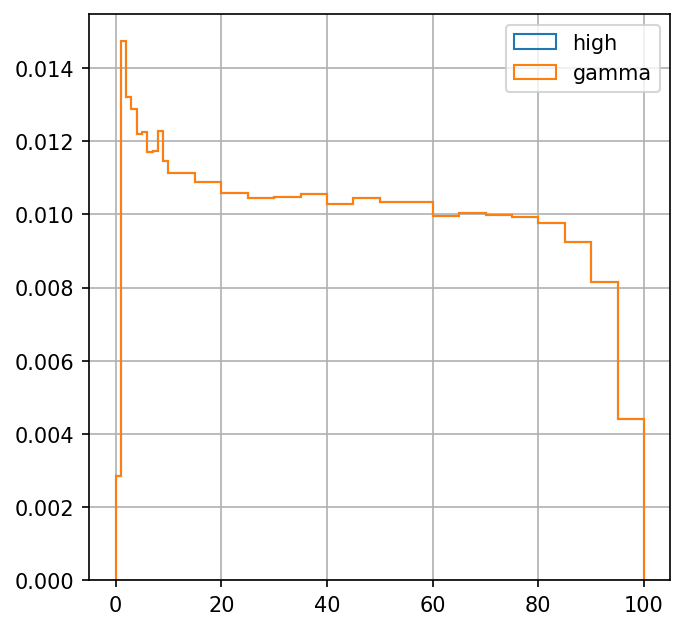

In [70]:
values_jets_high, bins, _ = plt.hist(et_window_high['et_window'], histtype='step',  bins=bins, weights=et_window_high['weight'], density=True, label='high')
#values_jets_low, bins, _ = plt.hist(et_window_low['et_window'], histtype='step',  bins=bins, density=True, label='low')
values_gamma, bins, _ = plt.hist(et_window_gamma['et_window'], histtype='step',  bins=bins, density=True, label='gamma')
plt.legend()
plt.grid()

(0.0, 10.0)

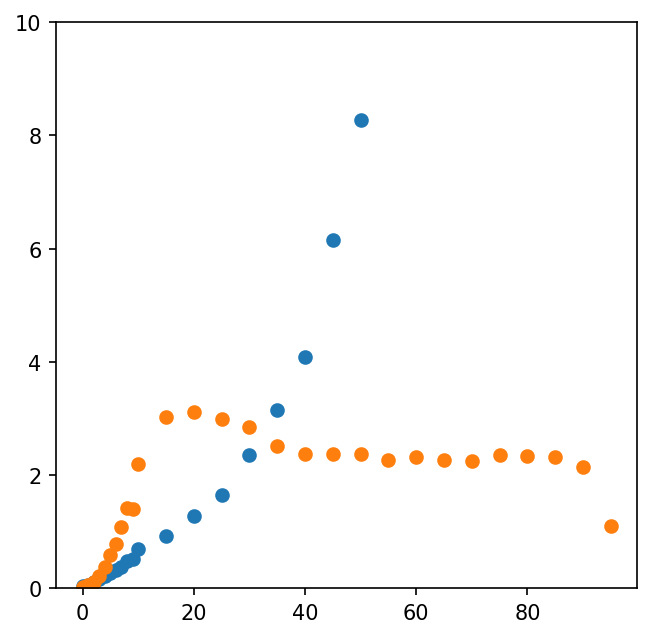

In [73]:
plt.scatter(bins[:-1], ratio_low) 
plt.scatter(bins[:-1], ratio_high)
plt.ylim(0,10)

In [9]:
import numpy as np 
bins = [0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100, np.inf]

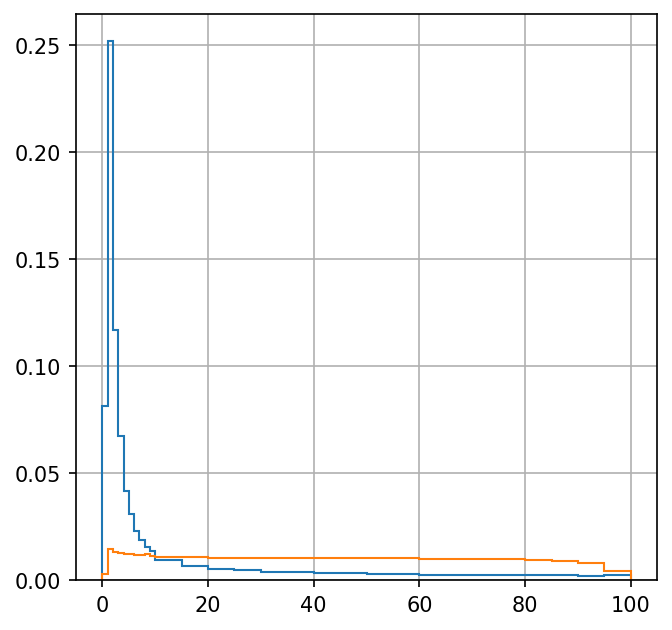

In [10]:
values_jets, bins, _ = plt.hist(et_window_jet['et_window'], histtype='step',  bins=bins, density=True)
values_gamma, bins, _ = plt.hist(et_window_gamma['et_window'], histtype='step',  bins=bins, density=True)
plt.grid()

In [14]:
ratio = values_gamma/values_jets
ratio.shape, bins.shape

/tmp/ipykernel_785/1267314534.py:1: RuntimeWarning: invalid value encountered in true_divide
  ratio = values_gamma/values_jets


((29,), (30,))

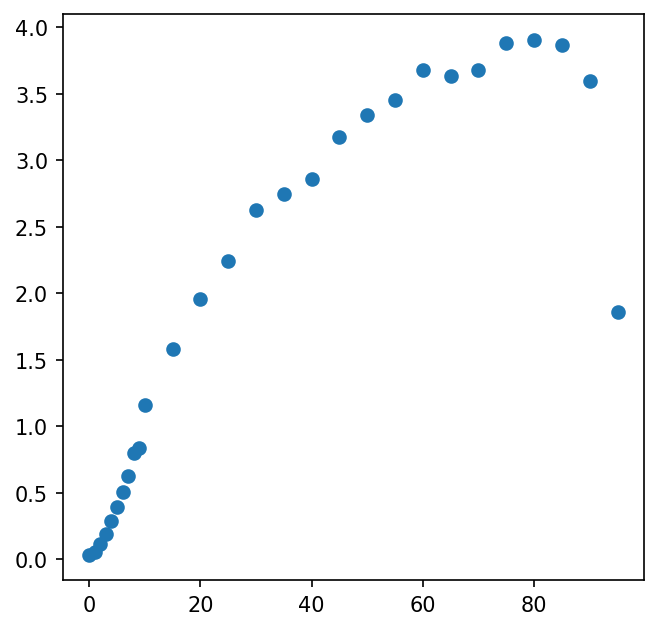

In [15]:
plt.scatter(bins[:-1], ratio) 

In [17]:
et_window_jet['et_window'].shape, ratio.shape

((102328,), (29,))

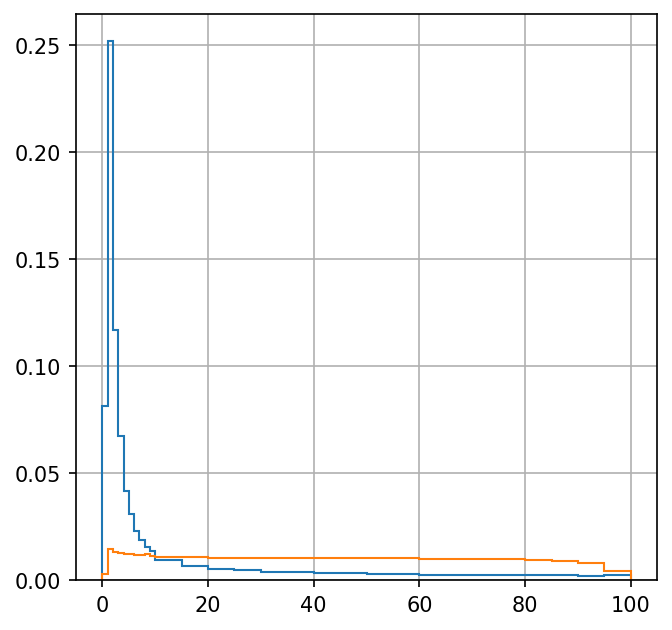

In [18]:
values_jets, bins, _ = plt.hist(et_window_jet['et_window'], histtype='step',  bins=bins, density=True)
values_gamma, bins, _ = plt.hist(et_window_gamma['et_window'], histtype='step',  bins=bins, density=True)
plt.grid()

In [162]:
d = {'start_bin': bins[:-1],
    'end_bin': bins[1:], 
    'weight': ratio}

In [163]:
df_weights = pd.DataFrame(data=d)

In [164]:
import numpy as np
et_window_jet['w_bin'] = np.digitize(et_window_jet.et_window, bins)-1

In [165]:
et_window_jet['w_bin'].values

array([ 1, 18, 10, ...,  0,  0,  1])

In [169]:
df_weights.weight.loc[28] = 0

In [200]:
bins = df_weights.start_bin.values

In [108]:
bins = df_weights['end_bin'].values 

In [202]:
my_values = [1.2, 4.1, 12.0]


In [203]:
bins

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,  60.,  65.,
        70.,  75.,  80.,  85.,  90.,  95., 100.], dtype=float32)

In [201]:
bins = bins.astype(np.float32)

In [74]:
df_weights.iloc[et_window_jet['w_bin']]

,weight
1,0.058515
18,3.341666
10,1.161105
1,0.058515
1,0.058515
...,...
2,0.112957
3,0.190385
0,0.034970
0,0.034970


,start_bin,end_bin,weight
0,0,1,0.034970
1,1,2,0.058515
2,2,3,0.112957
3,3,4,0.190385
4,4,5,0.290618
5,5,6,0.394501
6,6,7,0.503767
7,7,8,0.623328
8,8,9,0.796345
9,9,10,0.835133


In [60]:
et_window_jet['w_bin']

0          1
1         18
2         10
3          1
4          1
          ..
199992     2
199993     3
199995     0
199997     0
199999     1
Name: w_bin, Length: 102328, dtype: int64

In [52]:
df_jet.join(pd.DataFrame(ratio, columns=['weight']), on='w_bin')

et_cluster  in_sc  parton_pdg  et_window  w_bin    weight
0      0    1.146046      1         2.0   1.146046      1  0.058515
       1    0.257063      0         2.0   0.000000      0  0.034970
       2    0.227914      1         2.0   0.227914      0  0.034970
       3    0.220428      0         2.0   0.000000      0  0.034970
1      0   15.198343      1        21.0  15.198343     11  1.579901
...              ...    ...         ...        ...    ...       ...
199997 0    0.942884      1        -1.0   0.942884      0  0.034970
       1    0.337245      0        -1.0   0.000000      0  0.034970
       2    0.318488      0        -1.0   0.000000      0  0.034970
199998 1    5.222727      1        21.0   5.222727      5  0.394501
199999 0    1.596631      1        21.0   1.596631      1  0.058515

[777634 rows x 6 columns]

In [ ]:
d